Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more. 
Here is the data of the impressions of posts of an Instagram User.


In [ ]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
location='/content/drive/MyDrive/Colab Notebooks/Instagram reach analysis/Instagram data.csv'

In [ ]:
data=pd.read_csv(location,encoding='latin1')

In [ ]:
data


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [ ]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
#check for null values 
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

NO null values in any row
If there is any null found then , use 

1.   data=data.dropna() to drop null rows and returns new dataframe
2.   data.dropna(inplace=True) drop null rows in original dataframe 





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


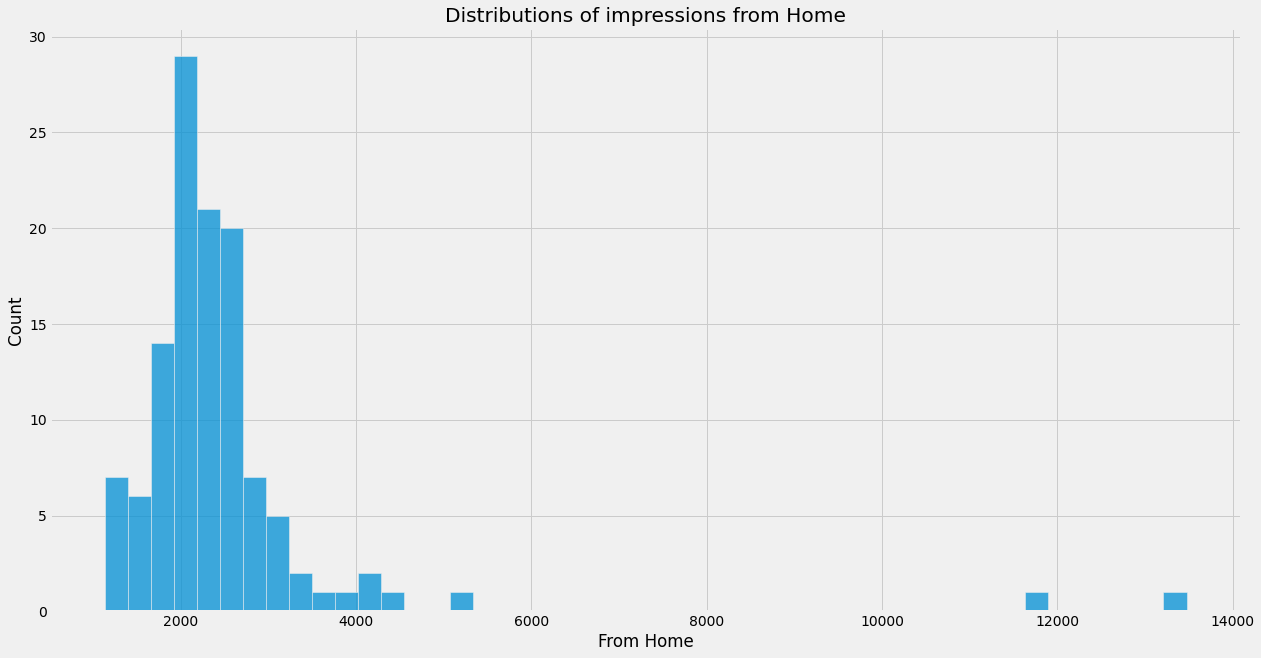

In [ ]:
#distribution of impressions received from Home 
plt.figure(figsize=(19,10))
sns.histplot(data['From Home'])
plt.title('Distributions of impressions from Home')
plt.show()

The above histogram shows, the number of posts whose views from Home is 2000 is approx 28

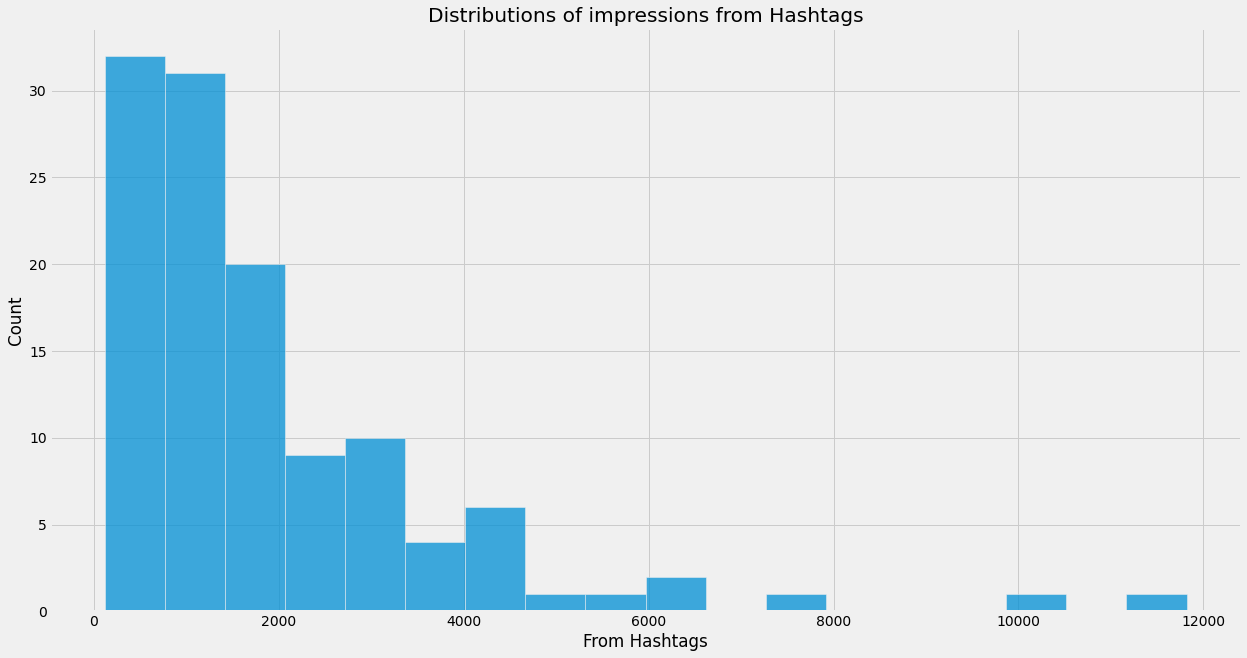

In [ ]:
#distribution of impressions received from Hashtags
plt.figure(figsize=(19,10))
sns.histplot(data['From Hashtags'])
plt.title('Distributions of impressions from Hashtags')
plt.show()

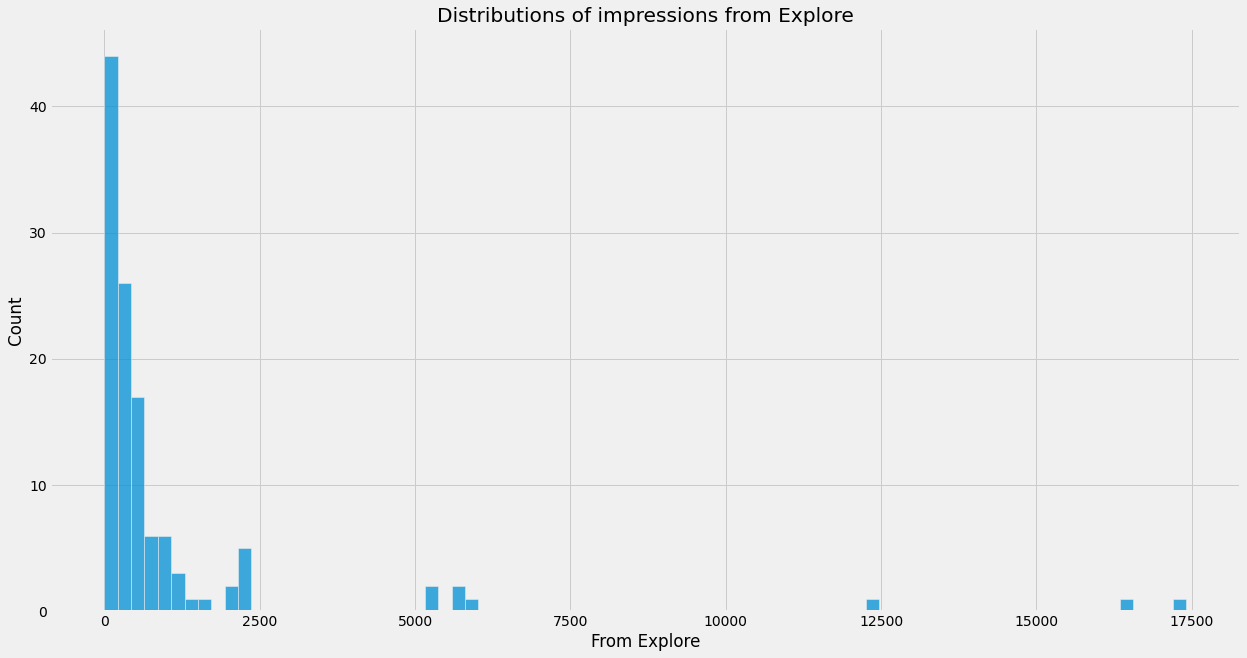

In [ ]:
#distribution of impressions received from Home 
plt.figure(figsize=(19,10))
sns.histplot(data['From Explore'])
plt.title('Distributions of impressions from Explore')
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests.

In [ ]:
#analyzing impressions from various sources 
home=data['From Home'].sum()
hashtags=data['From Hashtags'].sum()
explore=data['From Hashtags'].sum() 
other=data['From Other'].sum() 

labels=['From Home','From Hashtags','From Explore','From others']
values=[home,hashtags,explore,other]

fig=px.pie(data,values=values,names=labels,title='Impressions from different sources')
fig.show()

Here we can see, User is getting the most views (38.6%) from Home only (i.e. from followers) 

The dataset has two columns, namely caption and hashtags, which will help understand the kind of content User post on Instagram.

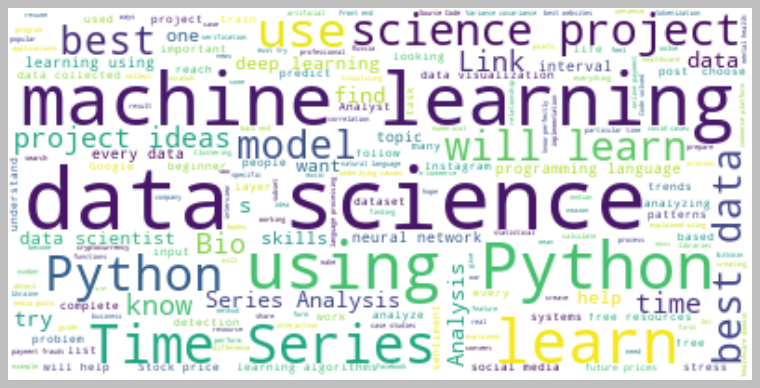

In [ ]:
#lets create word cloud for captions from post

text=" ".join(i for i in data.Caption) 
stopwords=set(STOPWORDS) 
wordcloud=WordCloud(stopwords=stopwords,background_color='White').generate(text) 
plt.style.use('classic') 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis('off') 
plt.show()


Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.
STOPWORDS has default list of stopwords.

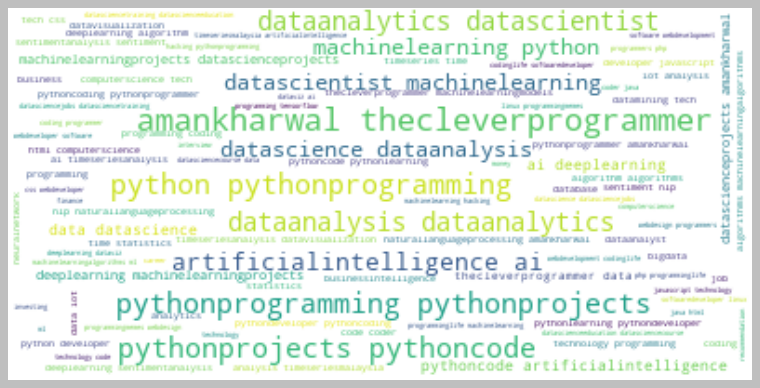

In [ ]:
#lets create word clouds for hashtags from posts 

text=" ".join(i for i in data.Hashtags) 
stopwords=set(STOPWORDS) 
wordcloud=WordCloud(stopwords=stopwords,background_color='White').generate(text) 
plt.style.use('classic') 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis('off') 
plt.show()

The user is revealed. He is Aman Kharwal 🙂

In [ ]:
#relations between Impressions and Likes 
figure=px.scatter(data_frame=data,x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship between Likes and Impressions") 
figure.show()

#ols = ordinary least square 

In [ ]:
#relations between Impressions and comments
figure=px.scatter(data_frame=data,x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationship between comments and Impressions") 
figure.show()

#ols = ordinary least square 

In [ ]:
#relations between Impressions and shares 
figure=px.scatter(data_frame=data,x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship between shares and Impressions") 
figure.show()

#ols = ordinary least square 

In [ ]:
#relations between Impressions and saves
figure=px.scatter(data_frame=data,x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship between saves and Impressions") 
figure.show()

#ols = ordinary least square 

There is a linear relationship between the number of times the post is saved and the reach of Instagram post.

In [ ]:
#lets calculate correlation of all values 

correlation=data.corr()
correlation


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


In [ ]:
#correlation of impressions wrt other 
correlation["Impressions"].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

So more follower, more likes and more saves will help get more reach 

***The conversion rate ***

conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is  ** (Follows/Profile Visits) * 100. **

In [ ]:
conversion_rate= ((data['Follows'].sum()/data['Profile Visits'].sum())*100) 
conversion_rate

41.00265604249668

41% users will press follow button once they visit profile 

In [ ]:
#Profile visits vs follows 

figure=px.scatter(data_frame=data,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title="Relationship between profile visits and follower gained") 
figure.show()

#ols = ordinary least square 

# Instagram Reach prediction Model

In [ ]:
x=np.array(data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']]) 
y=np.array(data["Impressions"]) 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
model=PassiveAggressiveRegressor() 
model.fit(xtrain,ytrain) 
model.score(xtest,ytest)

0.916043404981856

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features) 


array([11509.62139158])

approx 11k views 